<a href="https://colab.research.google.com/github/RamyaKGokul/Python-DL-Projects/blob/main/Handwritten_Digit_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sample handwritten digits


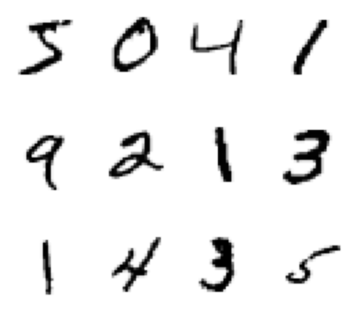

Epoch 1/10
469/469 [==============================] - 53s 113ms/step - loss: 0.3389 - accuracy: 0.8967 - val_loss: 0.0868 - val_accuracy: 0.9747
Epoch 2/10
469/469 [==============================] - 52s 112ms/step - loss: 0.1054 - accuracy: 0.9686 - val_loss: 0.0560 - val_accuracy: 0.9829
Epoch 3/10
469/469 [==============================] - 53s 112ms/step - loss: 0.0793 - accuracy: 0.9757 - val_loss: 0.0440 - val_accuracy: 0.9864
Epoch 4/10
469/469 [==============================] - 53s 113ms/step - loss: 0.0672 - accuracy: 0.9799 - val_loss: 0.0394 - val_accuracy: 0.9878
Epoch 5/10
469/469 [==============================] - 53s 113ms/step - loss: 0.0604 - accuracy: 0.9812 - val_loss: 0.0346 - val_accuracy: 0.9887
Epoch 6/10
469/469 [==============================] - 53s 114ms/step - loss: 0.0527 - accuracy: 0.9839 - val_loss: 0.0317 - val_accuracy: 0.9897
Epoch 7/10
469/469 [==============================] - 53s 113ms/step - loss: 0.0480 - accuracy: 0.9848 - val_loss: 0.0305 - val_ac

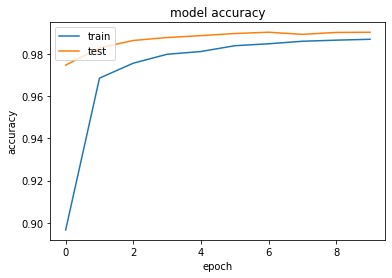

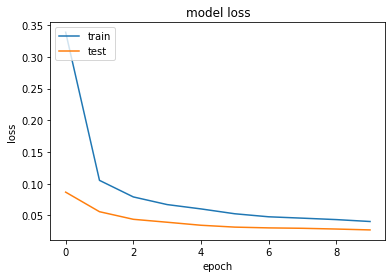

313/313 [==============================] - 4s 11ms/step
Sample Predictions with test data
First 12 predictions
 [7 2 1 0 4 1 4 9 5 9 0 6]
Actual 12 data labels
 [7 2 1 0 4 1 4 9 5 9 0 6]
Overall Accuracy:	99.03%

Confusion Matrix showing the model's prediction performance


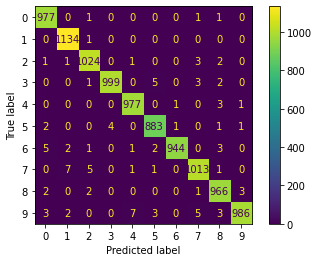

In [ ]:
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras import layers
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np

# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data, split between train and validation sets
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

print("Sample handwritten digits")
# Plotting the data
plt.figure(figsize=(5,5))
for k in range(12):
    plt.subplot(3, 4, k+1)
    plt.imshow(X_train[k], cmap='Greys')
    plt.axis('off')
plt.tight_layout()
plt.show()

# convert class vectors to binary class matrices
y_training = keras.utils.to_categorical(y_train, num_classes)
y_validation = keras.utils.to_categorical(y_valid, num_classes)

# Scale images to the [0, 1] range
X_train_cnn = X_train.astype("float32") / 255
X_valid_cnn = X_valid.astype("float32") / 255

# Redefine  dimension of train/test inputs
X_train_cnn = np.expand_dims(X_train_cnn, -1)
X_valid_cnn = np.expand_dims(X_valid_cnn, -1)

# Building a CNN model
model_cnn = keras.Sequential(
    [
        keras.layers.InputLayer(input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

# Compiling the model
model_cnn.compile(
    loss="categorical_crossentropy", 
    optimizer="adam", 
    metrics=["accuracy"]
)

batch_size=128
epochs=10

# Fitting the model with the train data
history = model_cnn.fit(
  X_train_cnn, # training data
  y_training, # training targets
  epochs=epochs,
  batch_size=batch_size,
  verbose=1,
  validation_data=(X_valid_cnn, y_validation)
)

# Summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Evaluating the model
model_cnn.evaluate(X_valid_cnn, y_validation)

# Making predictions on the test data
y_pred = np.argmax(model_cnn.predict(X_valid_cnn), axis=-1)

# Printing the predictions
print("Sample Predictions with test data")
print("First 12 predictions\n",y_pred[0:12])
print("Actual 12 data labels\n",y_valid[0:12])

# Finding the accuracy of the prediction
acc=metrics.accuracy_score(y_valid,y_pred)

# Printing the accuracy
print("Overall Accuracy:\t{0:.2f}%".format(acc*100))

# Plotting the confusion matrix
print("\nConfusion Matrix showing the model's prediction performance")
disp=ConfusionMatrixDisplay.from_predictions(y_valid,y_pred)